In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [1]:
data=nc.Dataset('/ihesp/shared/xiliang/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.nday1.HMXL.nc')
plotvar2 = data.variables['HMXL']

NameError: name 'nc' is not defined

In [3]:
plotvar2.shape

(2098, 2400, 3600)

In [20]:
12*162

1944

In [8]:
plo = plotvar2[8:2098:12,224:343,600:1400]

In [9]:
plo.shape

(175, 119, 800)

In [15]:
result = plo.mean(axis=1)

In [16]:
A = np.arange(175)
B = np.arange(800)
xx, yy = np.meshgrid(B, A)

In [17]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([130,150,160,170,190,200,210,220,230,245]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0,200,300,400,500,600,800,1000,1200,1500]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  


Text(0.5, 1.0, 'Mixed-Layer Depth (64$^\\circ$S -69$^\\circ$S)')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


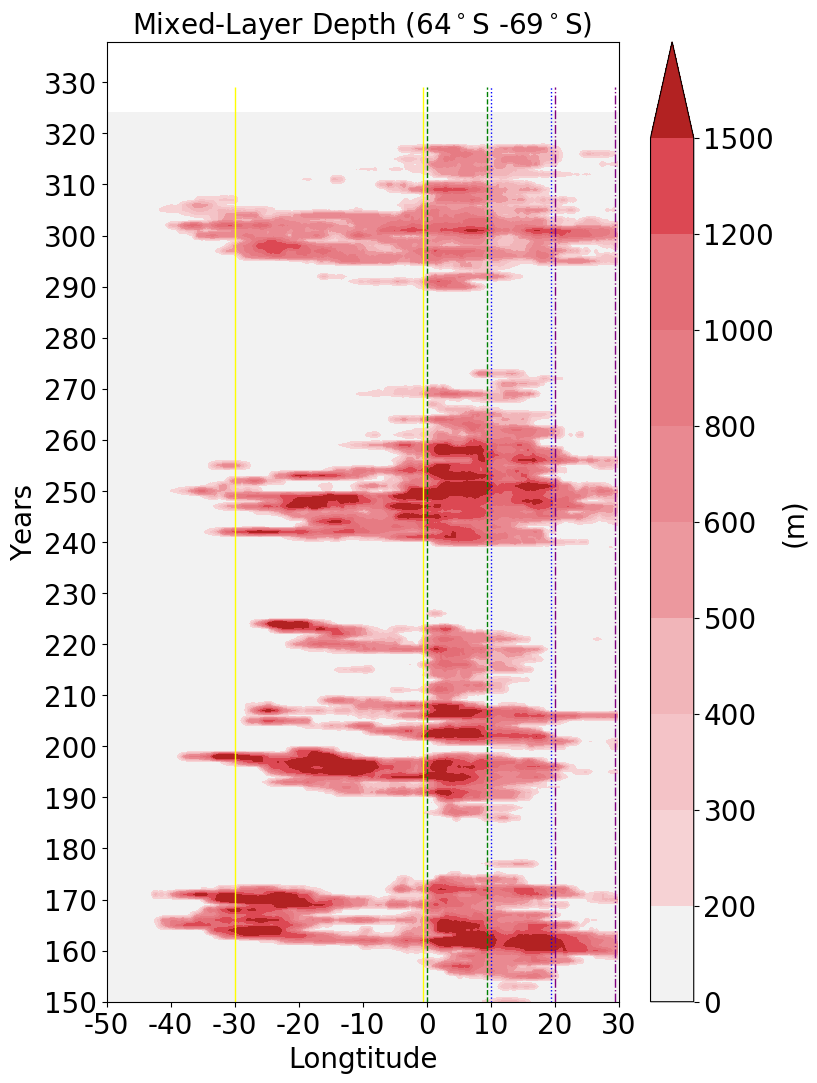

In [18]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, result/100, cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')
im.cmap.set_over('firebrick')
cbar = fig.colorbar(im, ax=ax0,extendfrac='auto',ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(m)', **my_font)
ax0.set_title('Mixed Layer Depth')
#plt.hlines((27-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((39-20)*4, 0, 699, colors = "y",linestyles = "dashed")
###plt.hlines((56-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((69-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((94-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((106-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((120-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((138-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((168-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((203-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((252-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((261-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((300-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((326-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.vlines(430, 0, 159, colors = "b",linestyles = "dashed")
plt.vlines(200, 0, 179, colors = "yellow",linestyles = "solid",linewidth=1)
plt.vlines(495, 0, 179, colors = "yellow",linestyles = "solid",linewidth=1)


plt.vlines(500, 0, 179, colors = "green",linestyles = "dashed",linewidth=1)
plt.vlines(595, 0, 179, colors = "green",linestyles = "dashed",linewidth=1)

plt.vlines(600, 0, 179, colors = "blue",linestyles = "dotted",linewidth=1)
plt.vlines(695, 0, 179, colors = "blue",linestyles = "dotted",linewidth=1)


plt.vlines(700, 0, 179, colors = "purple",linestyles = 'dashdot',linewidth=1)
plt.vlines(795, 0, 179, colors = "purple",linestyles = "dashdot",linewidth=1)
#############################################################################
##设定X坐标值
plt.xticks(range(0,900,100), ['-50','-40','-30', '-20', '-10', '0','10','20', '30','40'],**my_font)
plt.yticks(range(0,181,10), ['150','160','170',\
                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Mixed-Layer Depth (64$^\circ$S -69$^\circ$S)',**my_font)